TUGAS AKHIR Big Data Analytic PySpark BISA AI

Nama : Daffa Andika Zain
NIM : 2010512030
Kelas : A / S1 Sistem Informasi

**1. Silahkan install PySpark**

In [74]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
dataset = pd.read_csv("/content/drive/MyDrive/PySpark/brain_stroke.csv")
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [79]:
resident_type_labels = dataset['Residence_type'].unique()
work_type_labels = dataset['work_type'].unique()
smoking_status_labels = dataset['smoking_status'].unique()

print('Residence type values:', resident_type_labels)
print('Work type values:', work_type_labels)
print('Smoking status values:', smoking_status_labels)

Residence type values: ['Urban' 'Rural']
Work type values: ['Private' 'Self-employed' 'Govt_job' 'children']
Smoking status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [80]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [81]:
def plot_simple(feature: str, bins=30):
    sns.histplot(dataset[feature], bins=bins, kde=True)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

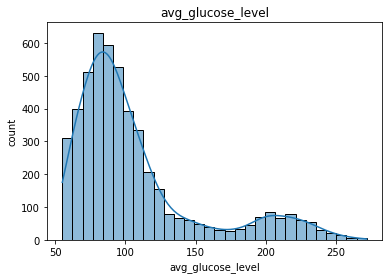

In [82]:
plot_simple('avg_glucose_level', bins=30)

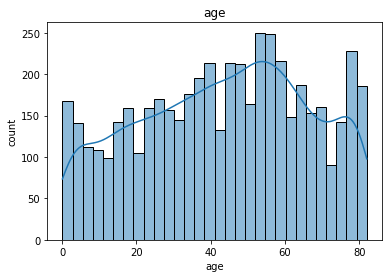

In [83]:
plot_simple('age', bins=30)

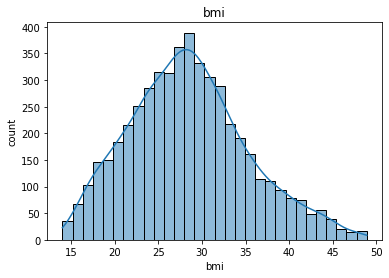

In [84]:
plot_simple('bmi', 30)

In [85]:
def create_comparation_graph(feature: str, bins=2, ticks=True):
    fig, ax = plt.subplots(1, 2, figsize=(7,4), sharey=True, constrained_layout=True)

    fig.suptitle('Stroke patient based on {}'.format(feature), fontsize=16)

    sns.histplot(pandaspd[pandaspd['stroke'] == 0][feature], bins=bins, ax=ax[0])
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel('No Stroke')
    if bins == 2:
        ax[0].set_xticks([0,1])
    if ticks: ax[0].set_xticklabels(['No', 'Yes'])

    sns.histplot(pandaspd[pandaspd['stroke'] == 1][feature], bins=bins, ax=ax[1])
    ax[1].set_xlabel('Stroke')
    if bins == 2:
        ax[1].set_xticks([0,1])
    if ticks: ax[1].set_xticklabels(['No', 'Yes'])

    fig.show()

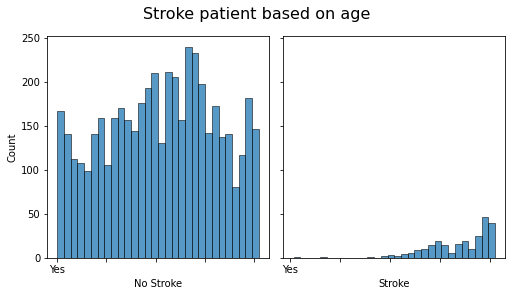

In [86]:
create_comparation_graph('age', 30)

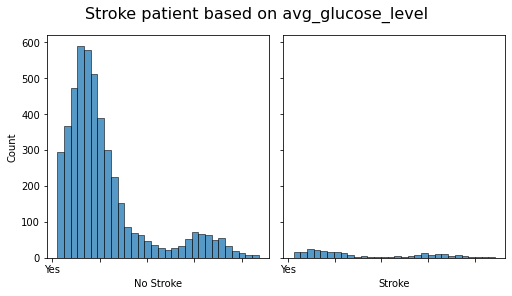

In [87]:
create_comparation_graph('avg_glucose_level', 30)

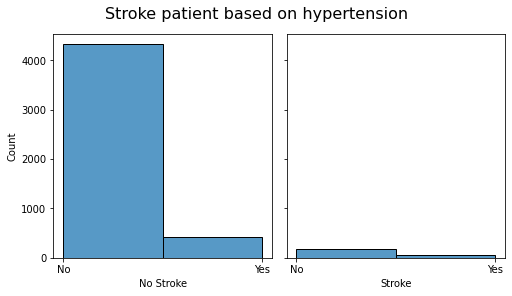

In [88]:
create_comparation_graph('hypertension')

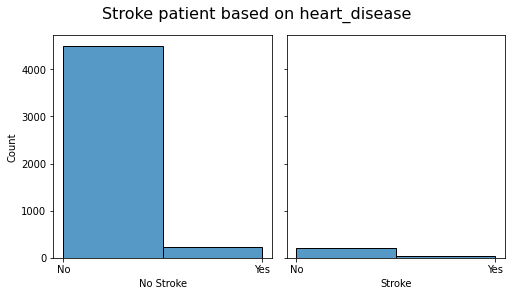

In [89]:
create_comparation_graph('heart_disease')

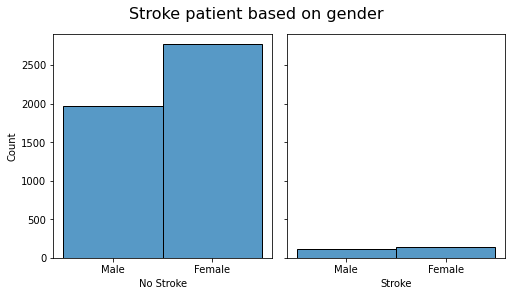

In [90]:
create_comparation_graph('gender', ticks=False)

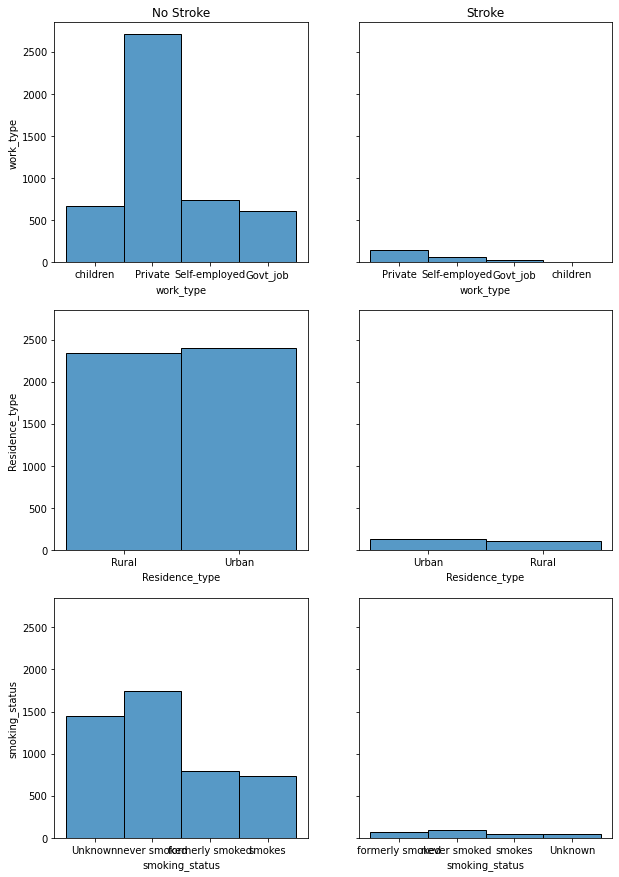

In [91]:
fig, axes = plt.subplots(3,2, figsize=(10,15), sharey=True)

graph_features = ['work_type', 'Residence_type','smoking_status']

for i, axe in enumerate(axes.flat):
    even = i % 2 == 0
    is_one = 0 if even else 1
    row = i // 2
    col = i // 3
    if even:
        if row == 0: axe.set_title('No Stroke')
        axe.set_ylabel(graph_features[row])
        sns.histplot(pandaspd[pandaspd['stroke'] == is_one][graph_features[row]], ax=axe)
    else:
        if row == 0: axe.set_title('Stroke')
        sns.histplot(pandaspd[pandaspd['stroke'] == is_one][graph_features[row]], ax=axe)

In [92]:
pandaspd.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.246478
heart_disease        0.134610
avg_glucose_level    0.133227
hypertension         0.131965
bmi                  0.056926
Name: stroke, dtype: float64

In [93]:
dataset.loc[ dataset['age'] <= 25, 'age'] = 0
dataset.loc[(dataset['age'] > 25) & (dataset['age'] <= 39), 'age'] = 1
dataset.loc[(dataset['age'] > 39) & (dataset['age'] <= 59), 'age'] = 2
dataset.loc[ dataset['age'] > 59, 'age'] = 3

In [94]:
dataset.loc[ dataset['bmi'] <= 23, 'bmi'] = 0
dataset.loc[(dataset['bmi'] > 23) & (dataset['bmi'] <= 28), 'bmi'] = 1
dataset.loc[(dataset['bmi'] > 28) & (dataset['bmi'] <= 32), 'bmi'] = 2
dataset.loc[ dataset['bmi'] > 32, 'bmi'] = 3

In [95]:
dataset.loc[ dataset['avg_glucose_level'] <= 50, 'avg_glucose_level'] = 0
dataset.loc[(dataset['avg_glucose_level'] > 50) & (dataset['avg_glucose_level'] <= 100), 'avg_glucose_level'] = 1
dataset.loc[(dataset['avg_glucose_level'] > 100) & (dataset['avg_glucose_level'] <= 150), 'avg_glucose_level'] = 2
dataset.loc[(dataset['avg_glucose_level'] > 150) & (dataset['avg_glucose_level'] <= 200), 'avg_glucose_level'] = 3
dataset.loc[ dataset['avg_glucose_level'] > 200, 'avg_glucose_level'] = 4

In [96]:
def to_numerical(feature: str):
    mapping = {}
    labels = dataset[feature].unique()
    for x, y in zip(labels, range(len(labels))):
        mapping[x] = y
    dataset[feature] = dataset[feature].map(mapping)

In [97]:
string_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for feature in string_features:
    to_numerical(feature)

In [98]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,1,0,0,0,4.0,3.0,0,1
1,0,3.0,0,1,0,0,1,2.0,3.0,1,1
2,1,2.0,0,0,0,0,0,3.0,3.0,2,1
3,1,3.0,1,0,0,1,1,3.0,1.0,1,1
4,0,3.0,0,0,0,0,0,3.0,2.0,0,1


In [99]:
X = dataset.drop('stroke',axis=1)
y = dataset.stroke

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [101]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X)

In [102]:
ss = StandardScaler(with_mean=False)
X = ss.fit_transform(X)

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [104]:
rf_c = RandomForestClassifier()
rf_c.fit(X_train, y_train)
rf_c.score(X_test, y_test)

0.9358074222668004

In [105]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9458375125376128

In [106]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test) 

0.9398194583751254

from: https://www.kaggle.com/code/greegtitan/start-your-first-classification-here/notebook 

dataset : https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset 